In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('seaborn-dark')
import warnings
warnings.filterwarnings("ignore")

C:\Users\modini vinay kumar\AppData\Local\Temp\ipykernel_42696\661493613.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [2]:
data = pd.read_csv('daily-website-visitors.csv')
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)

In [3]:
data.head()

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,,
2014-09-14,1,Sunday,1,"2,146","1,582","1,430",152
2014-09-15,2,Monday,2,"3,621","2,528","2,297",231
2014-09-16,3,Tuesday,3,"3,698","2,630","2,352",278
2014-09-17,4,Wednesday,4,"3,667","2,614","2,327",287
2014-09-18,5,Thursday,5,"3,316","2,366","2,130",236


In [4]:
data.tail()

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,,
2020-08-15,2163,Saturday,7,"2,221","1,696","1,373",323
2020-08-16,2164,Sunday,1,"2,724","2,037","1,686",351
2020-08-17,2165,Monday,2,"3,456","2,638","2,181",457
2020-08-18,2166,Tuesday,3,"3,581","2,683","2,184",499
2020-08-19,2167,Wednesday,4,"2,064","1,564","1,297",267


In [5]:
data.isnull().sum()

Row                  0
Day                  0
Day.Of.Week          0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,Row,Day.Of.Week
count,2167.000000,2167.000000
mean,1084.000000,3.997231
std,625.703338,2.000229
min,1.000000,1.000000
25%,542.500000,2.000000
50%,1084.000000,4.000000
75%,1625.500000,6.000000
max,2167.000000,7.000000


In [10]:
data['Page.Loads'].value_counts() 

2,948    5
3,973    4
3,795    4
4,205    4
3,456    4
        ..
6,576    1
6,941    1
6,507    1
3,081    1
2,064    1
Name: Page.Loads, Length: 1756, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2167 entries, 2014-09-14 to 2020-08-19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Page.Loads         2167 non-null   object
 4   Unique.Visits      2167 non-null   object
 5   First.Time.Visits  2167 non-null   object
 6   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(5)
memory usage: 135.4+ KB


In [12]:
data.columns

Index(['Row', 'Day', 'Day.Of.Week', 'Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder =  LabelEncoder()

In [14]:
df=data.drop("Day",axis=1)
#df=data.drop("Date",axis=1)

In [15]:
df.head()

,Row,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,
2014-09-14,1,1,"2,146","1,582","1,430",152
2014-09-15,2,2,"3,621","2,528","2,297",231
2014-09-16,3,3,"3,698","2,630","2,352",278
2014-09-17,4,4,"3,667","2,614","2,327",287
2014-09-18,5,5,"3,316","2,366","2,130",236


In [16]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
#Encoding data
labelDict = {}
for feature in df:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)



label_Row [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [17]:
df

,Row,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,
2014-09-14,0,0,140,147,170,6
2014-09-15,1,1,652,566,651,51
2014-09-16,2,2,685,621,685,92
2014-09-17,3,3,672,608,670,101
2014-09-18,4,4,526,488,537,56
...,...,...,...,...,...,...
2020-08-15,2162,6,165,191,142,137
2020-08-16,2163,0,315,333,289,163
2020-08-17,2164,1,585,625,572,266


In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

Row                  0
Day.Of.Week          0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64

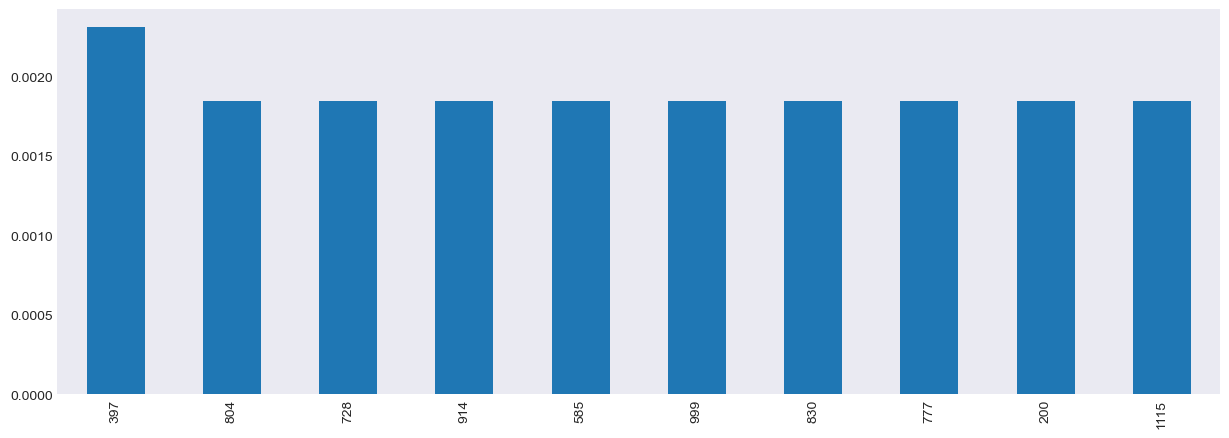

In [20]:
plt.figure(figsize = (15,5))
df['Page.Loads'].value_counts(normalize = True).head(10).plot.bar()
plt.show()

In [21]:
import seaborn as sns

<Axes: xlabel='Row', ylabel='Density'>

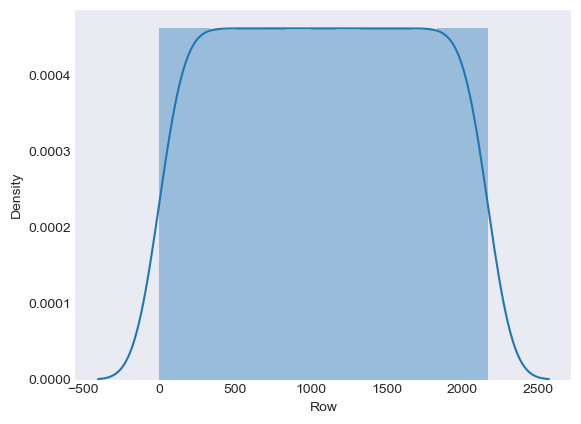

In [22]:
sns.distplot(data['Row'])

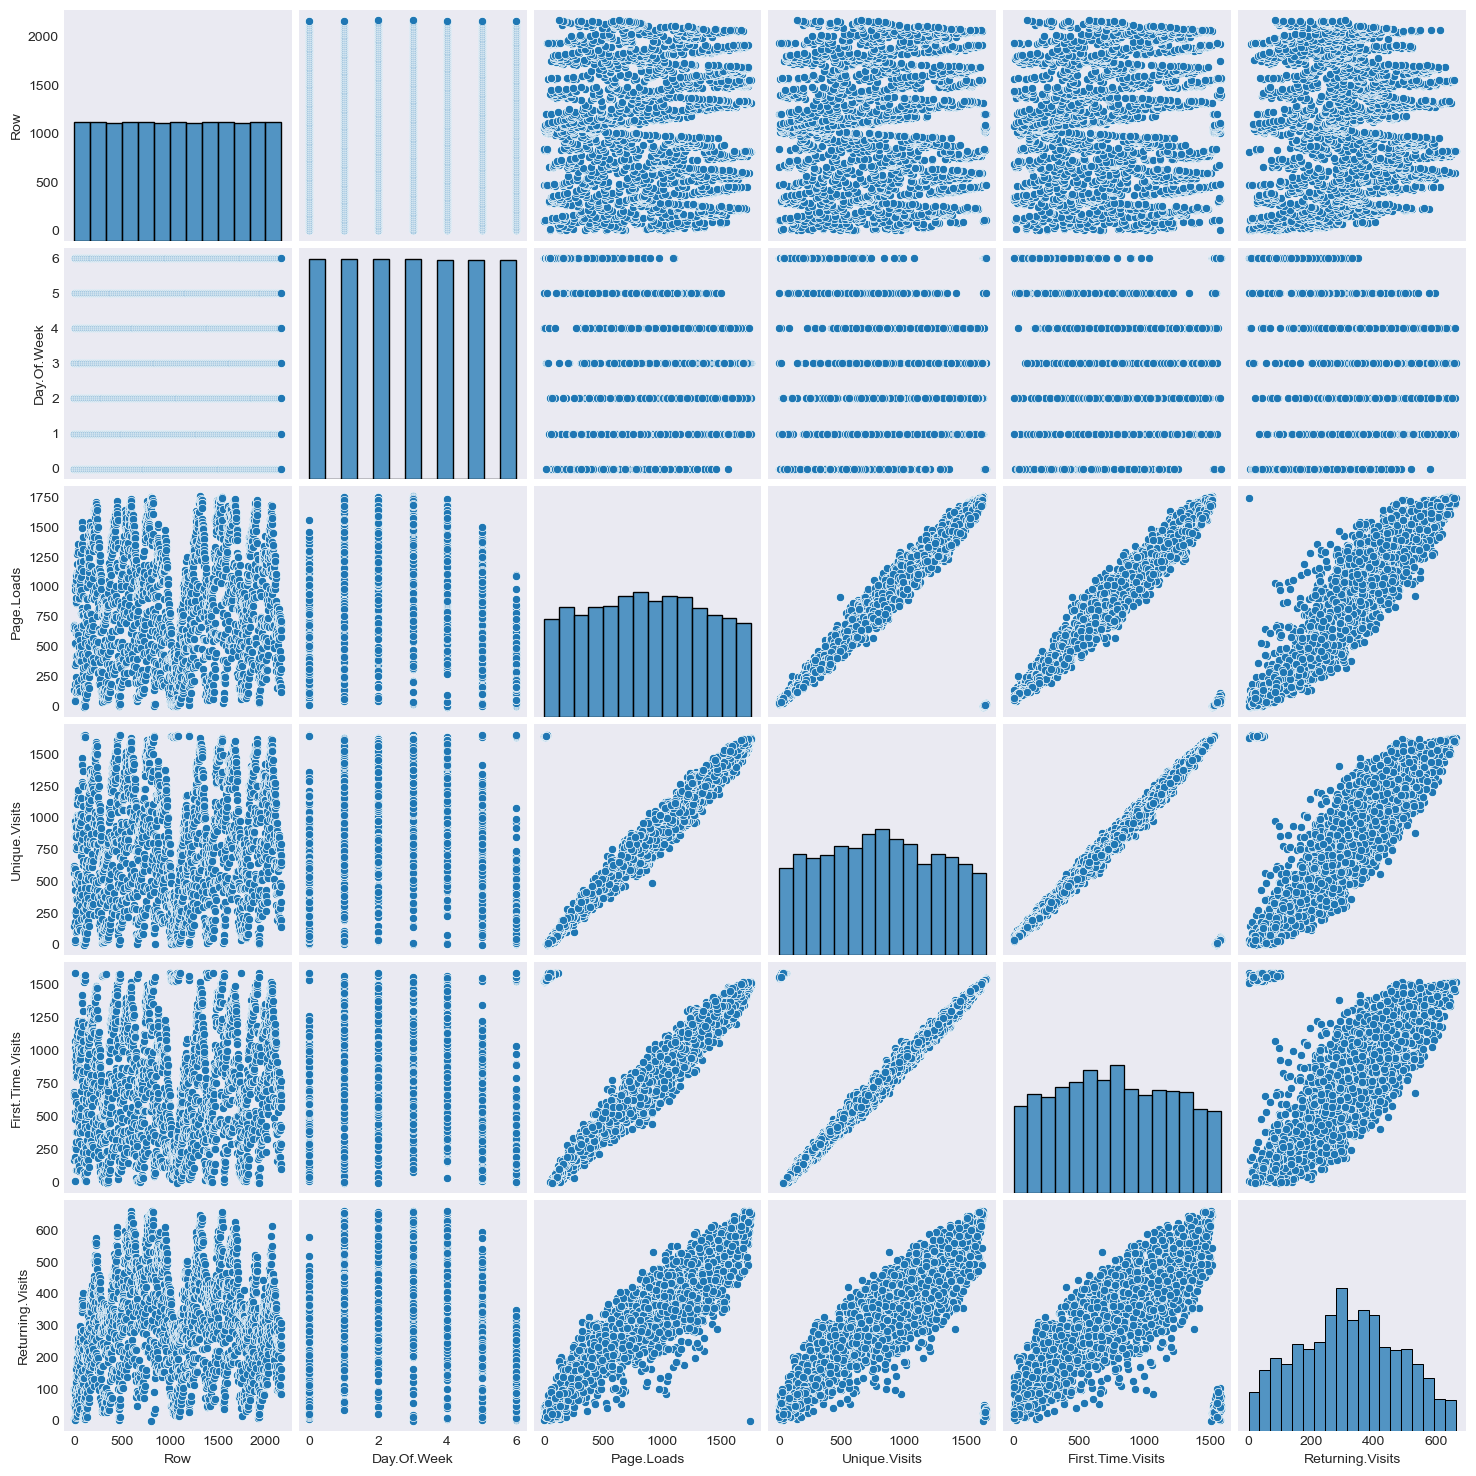

In [23]:
sns.pairplot(df)

In [24]:
df.corr()

,Row,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Row,1.000000,0.000800,0.050860,0.052717,0.042353,0.055028
Day.Of.Week,0.000800,1.000000,-0.253775,-0.220322,-0.196992,-0.217397
Page.Loads,0.050860,-0.253775,1.000000,0.911606,0.758173,0.904287
Unique.Visits,0.052717,-0.220322,0.911606,1.000000,0.844804,0.811745
First.Time.Visits,0.042353,-0.196992,0.758173,0.844804,1.000000,0.624405
Returning.Visits,0.055028,-0.217397,0.904287,0.811745,0.624405,1.000000


<Axes: >

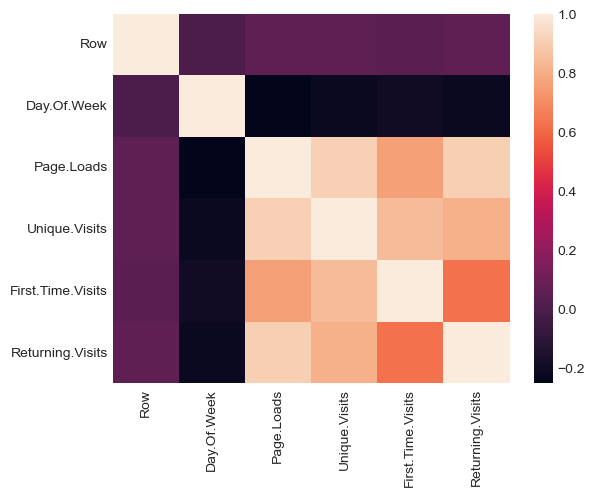

In [25]:
sns.heatmap(df.corr())

In [26]:
X=df.iloc[:,df.columns !='Page.Loads']
y=df.iloc[:,df.columns =='Page.Loads']

In [27]:
y

,Page.Loads
Date,
2014-09-14,140
2014-09-15,652
2014-09-16,685
2014-09-17,672
2014-09-18,526
...,...
2020-08-15,165
2020-08-16,315
2020-08-17,585


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [29]:
X_train

,Row,Day.Of.Week,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,
2017-10-01,1113,0,236,204,119
2017-09-13,1095,3,538,482,243
2015-01-17,125,6,47,16,20
2019-01-19,1588,6,283,247,144
2017-12-23,1196,6,1656,1537,34
...,...,...,...,...,...
2020-05-01,2056,5,1159,1110,362
2018-04-21,1315,6,695,617,305
2019-03-19,1647,2,1403,1284,524


In [30]:
y_train

,Page.Loads
Date,
2017-10-01,211
2017-09-13,588
2015-01-17,70
2019-01-19,332
2017-12-23,25
...,...
2020-05-01,1128
2018-04-21,825
2019-03-19,1584


In [31]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report,confusion_matrix
model = RandomForestRegressor(n_estimators=100, random_state=42) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(r2)

Mean Squared Error: 2218.81
0.9905884738654791


In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
tree=DecisionTreeRegressor()

In [34]:
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [35]:
y_predict=tree.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print(f"Mean Squared Error: {mse:.2f}")
print(r2)

Mean Squared Error: 3642.89
0.9845479555625073


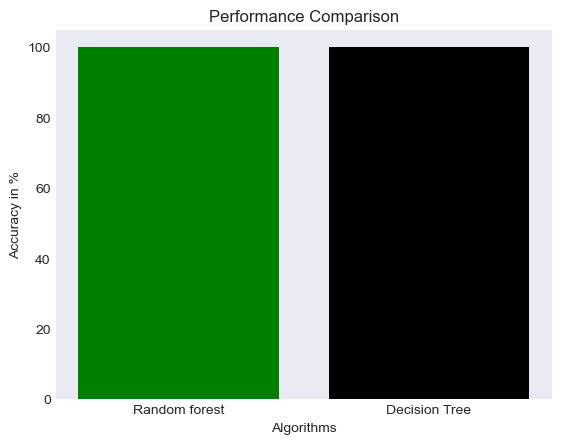

In [37]:
from matplotlib import pyplot as plt
# x-coordinates of left sides of bars  
left = [1,2] 
  
# heights of bars 
height = [99.91, 99.94] 
  
# labels for bars 
tick_label = ['Random forest','Decision Tree'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = [ 'green',"k"]) 
  
# naming the x-axis 
plt.xlabel('Algorithms') 
# naming the y-axis 
plt.ylabel('Accuracy in %') 
# plot title 
plt.title('Performance Comparison') 
  
# function to show the plot 
plt.rcParams['figure.figsize'] = (450,400)
plt.show()